In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importación de datos

In [ ]:
data = pd.read_csv('datos limpios')

In [25]:
data.head()

,Unnamed: 0,DBO5,DEPURADORA,MONTH,NT,PRUEBA,PT,SS,YEAR,DEPURADORA_2,MONTH_2,DATE
0,0,5.0,VIV,enero,15.8,1.0,0.91,5.0,2017.0,0,1,2017-1-1
1,1,5.0,VIV,enero,14.9,2.0,0.84,4.0,2017.0,0,1,2017-1-2
2,2,5.0,VIV,febrero,9.8,1.0,0.63,3.0,2017.0,0,2,2017-2-1
3,3,5.0,VIV,febrero,7.0,2.0,0.67,3.0,2017.0,0,2,2017-2-2
4,4,5.0,VIV,marzo,9.7,1.0,0.85,4.0,2017.0,0,3,2017-3-1


In [26]:
del(data['Unnamed: 0'])

In [27]:
data['YEAR'] = data['YEAR'].astype(np.int64)

In [28]:
data.head()

,DBO5,DEPURADORA,MONTH,NT,PRUEBA,PT,SS,YEAR,DEPURADORA_2,MONTH_2,DATE
0,5.0,VIV,enero,15.8,1.0,0.91,5.0,2017,0,1,2017-1-1
1,5.0,VIV,enero,14.9,2.0,0.84,4.0,2017,0,1,2017-1-2
2,5.0,VIV,febrero,9.8,1.0,0.63,3.0,2017,0,2,2017-2-1
3,5.0,VIV,febrero,7.0,2.0,0.67,3.0,2017,0,2,2017-2-2
4,5.0,VIV,marzo,9.7,1.0,0.85,4.0,2017,0,3,2017-3-1


## Análisis de los datos de los cluster pre-asignados por ubicación

In [29]:
data.groupby(['DEPURADORA_2'])['NT'].mean()

DEPURADORA_2
0     9.924359
1    10.515871
2    10.003001
3    13.963823
Name: NT, dtype: float64

In [30]:
data.groupby(['DEPURADORA_2'])['PT'].mean()

DEPURADORA_2
0    0.761282
1    0.622013
2    0.547263
3    0.542179
Name: PT, dtype: float64

In [31]:
data.groupby(['DEPURADORA_2'])['SS'].mean()

DEPURADORA_2
0     3.128205
1    11.899359
2     8.232051
3     2.983333
Name: SS, dtype: float64

In [32]:
data.groupby(['DEPURADORA_2'])['DBO5'].mean()

DEPURADORA_2
0    5.311538
1    9.141987
2    6.809615
3    4.614103
Name: DBO5, dtype: float64

Al analizar los datos agrupados por las depuradoras pre-definidas en función de la ubicacón se puede comprobar que los valores mejores definidos,sin tratar los datos son los de DBO5 y SS.Mientras que en el caso de el NT y PT,los valores son más parecidos entre los distintos grupos.

## Estádistica descriptiva de los datos

In [33]:
data_2=data.drop(columns=['PRUEBA', 'YEAR','DEPURADORA_2', 'MONTH_2'], axis=1) 

In [34]:
data_2.describe()

,DBO5,NT,PT,SS
count,624.000000,624.000000,624.000000,624.000000
mean,7.514103,10.744709,0.610755,8.771635
std,4.614830,4.779340,0.587375,6.482049
min,1.800000,1.300000,0.140000,1.000000
25%,5.000000,8.880000,0.447500,3.400000
50%,6.000000,9.260000,0.575000,8.000000
75%,10.000000,12.019479,0.680000,12.000000
max,38.000000,58.900000,13.000000,55.000000


Se observan distintos pesos de los contaminantes,viendo que en general la mayor concentración es la de N,seguida por SS y en último lugar P (al ser un elemento limitado).Esto se puede comprobar en el gráfico siguiente:

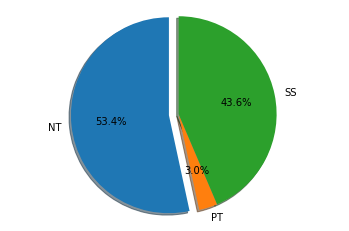

In [35]:
labels = 'NT', 'PT', 'SS'
sizes = [10.744709,0.610755 ,8.771635]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Matriz de correlación de las distintas variables

In [36]:
datos = data[['DBO5', 'NT', 'PT', 'SS']]
correlation = datos.corr()

In [37]:
correlation 

,DBO5,NT,PT,SS
DBO5,1.000000,-0.039197,0.061663,0.524270
NT,-0.039197,1.000000,-0.044778,0.032537
PT,0.061663,-0.044778,1.000000,0.098366
SS,0.524270,0.032537,0.098366,1.000000


Se observa una correlación importatnte entre el DBO5 y los SS,esto tiene sentido,puesto que cuanto mayor son los sólidos en suspensión,a priori,mayor necesidad BD05.

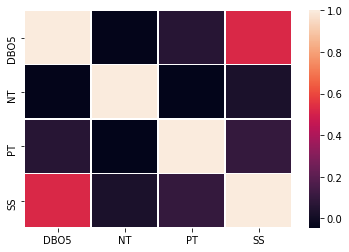

In [38]:
x = sns.heatmap(correlation, linewidths=.5)

## Análisis de los contaminantes en función de los años

En general se observa un mismo comportamiento a lo largo de los años,del mismo contaminante.Quitando momentos puntuales,en los quue se producen outliers.
Lo que nos interesa comparar fundamentalmente por su mayor relación en nuestra matriz de correlación es el DBO5 y los SS. 

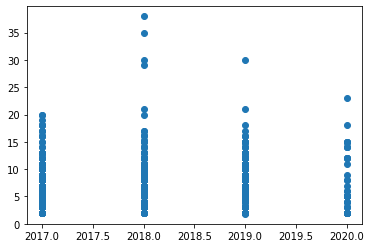

In [68]:
plt.scatter(data['YEAR'], data['DBO5'])

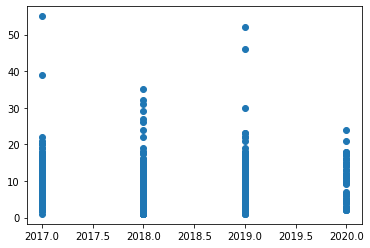

In [46]:
plt.scatter(data['YEAR'], data['SS'])

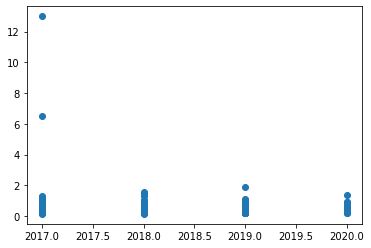

In [47]:
plt.scatter(data['YEAR'], data['PT'])

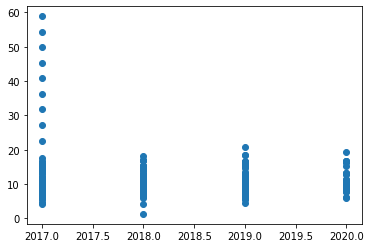

In [48]:
plt.scatter(data['YEAR'], data['NT'])

Se comprueba como se comportan estas 2 variables,si tienen un comportamiento parecido:
En principio no parece que esten distribuidas de la misma manera,cosa la cual tiene lógica ya que no tienen una relación indirecta,intervienen muchos más factores.

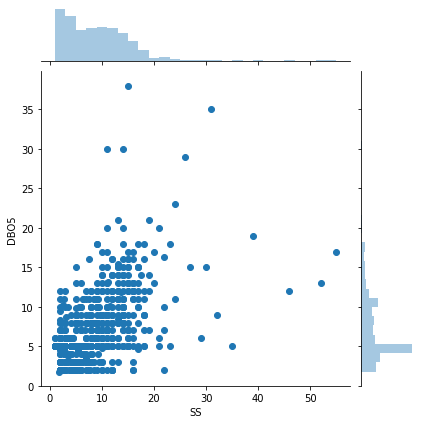

In [50]:
sns.jointplot(x='SS', y='DBO5', data=data)

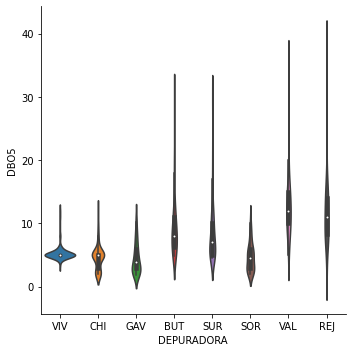

In [65]:
sns.catplot(x='DEPURADORA', y='DBO5', kind='violin', data=data)

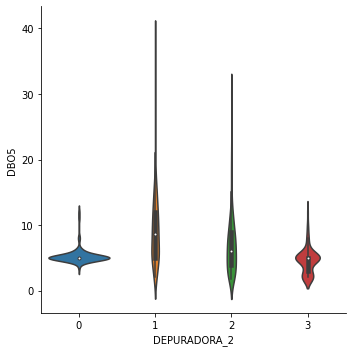

In [66]:
sns.catplot(x='DEPURADORA_2', y='DBO5', kind='violin', data=data)

Se observa que el comportamiento de un mismo contaminante no sigue la misma tendencia,que en el caso de los grupos preestablecidos,que este varian en el caso de la unión de varias depuradoras.No ocurriendo lo mismo en los casos que sólo hay una.

In [52]:
data.to_csv('depuradoras')